In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

In [307]:
pca = PCA()
data = pd.read_csv('harvard_migraines.csv', encoding='latin-1')
df = pd.DataFrame(data)
df = df[['Age at presentation', 'BMI']]
df = df.rename(columns={"Age at presentation": "Age"})
df = df.fillna(df.mean())
pd.to_numeric(df['Age'])


0     41.00
1     17.00
2     54.00
3     49.00
4     58.00
5     22.00
6     44.00
7     58.00
8     43.00
9     24.00
10    19.00
11    78.00
12    51.00
13    51.00
14    61.00
15    38.00
16    48.00
17    48.00
18    24.00
19    44.00
20    44.00
21    27.00
22    38.00
23    26.00
24    38.00
25    50.00
26    62.00
27    42.00
28    48.00
29    38.00
30    49.00
31    62.00
32    52.00
33    42.00
34    59.00
35    48.00
36    39.00
37    44.00
38    42.00
39    45.00
40    30.00
41    26.00
42    66.00
43    32.00
44    46.00
45    47.00
46    58.00
47    43.00
48    38.00
49    43.00
50    43.92
51    43.92
Name: Age, dtype: float64

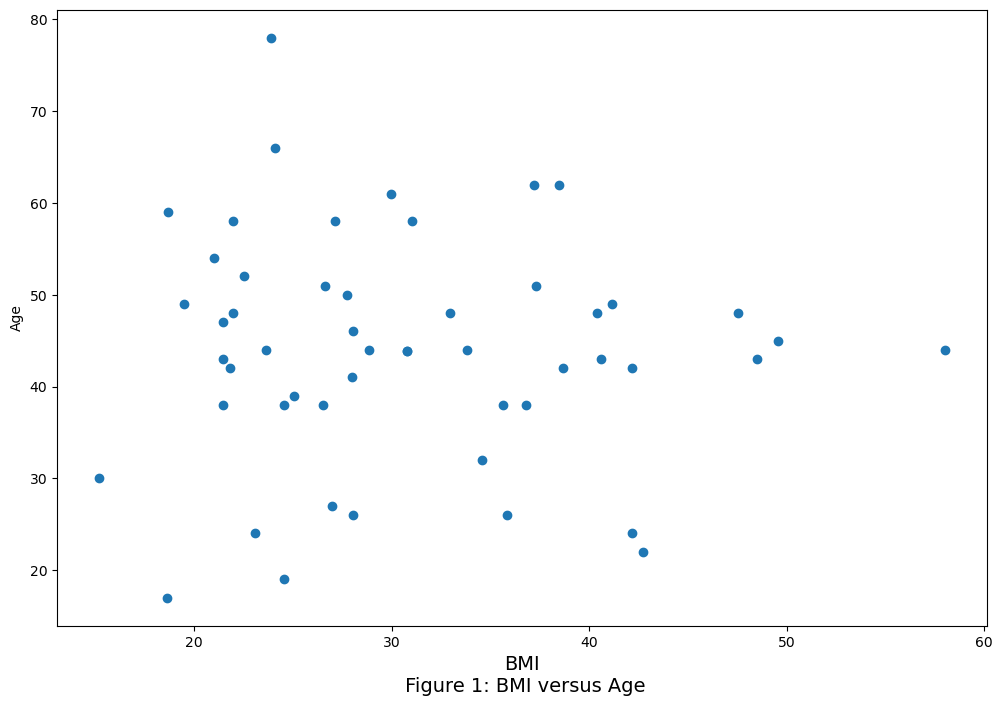

In [308]:
plt.figure(figsize=(12,8)) 
plt.scatter(df['BMI'], df['Age'])
plt.xlabel('BMI\n Figure 1: BMI versus Age', fontsize=14)
plt.ylabel('Age')
plt.show()

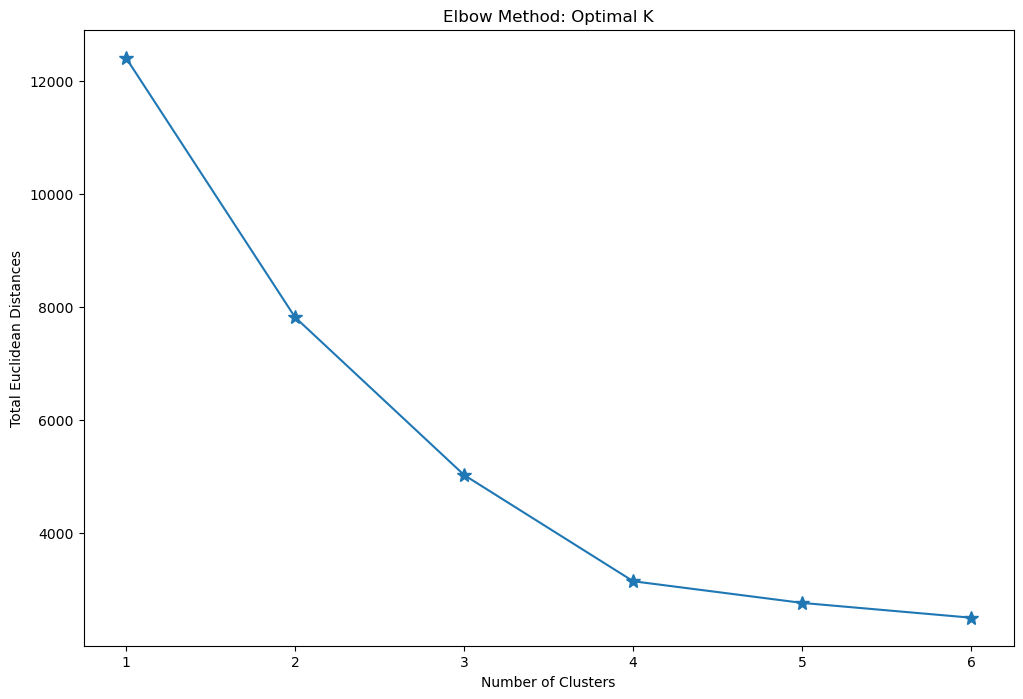

In [309]:
plt.figure(figsize=(12,8))

euclidean_distances = []
K = range(1,7)
for k in range(1,7):
    k_means = KMeans(n_clusters=k,init = 'k-means++', n_init='auto', random_state=109)
    model = k_means.fit(df)
    euclidean_distances.append(k_means.inertia_)

plt.plot(K, euclidean_distances, marker='*', markersize=10)
plt.xlabel('Number of Clusters')
plt.ylabel('Total Euclidean Distances')
plt.title('Elbow Method: Optimal K')
plt.show()

In [310]:
df = pca.fit_transform(df)

kmeans = KMeans(n_clusters=4, random_state=42, init ='k-means++', n_init='auto')

prediction = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

prediction = kmeans.fit_predict(df)

centroids

array([[ -0.90695785,   3.58890688],
       [ 13.4083136 ,  -4.14969623],
       [-19.5837065 ,  -9.16832924],
       [-18.36246867,   7.02338403]])

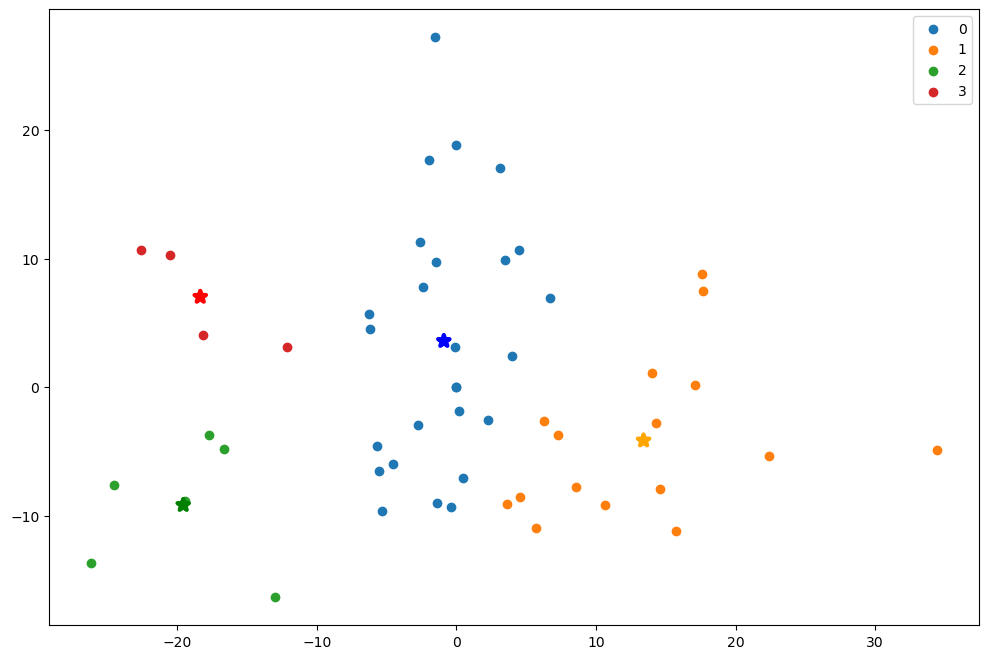

In [311]:
plt.figure(figsize=(12,8))
 
#plotting the results:
for i in np.unique(prediction):
    plt.scatter(df[prediction == i , 0], df[prediction == i , 1] , label = i)

plt.scatter(centroids[:,0],centroids[:,1],marker = "*", s=75,linewidths = 3, c=['blue', 'orange','green', 'red'])
plt.legend()
 
plt.show()

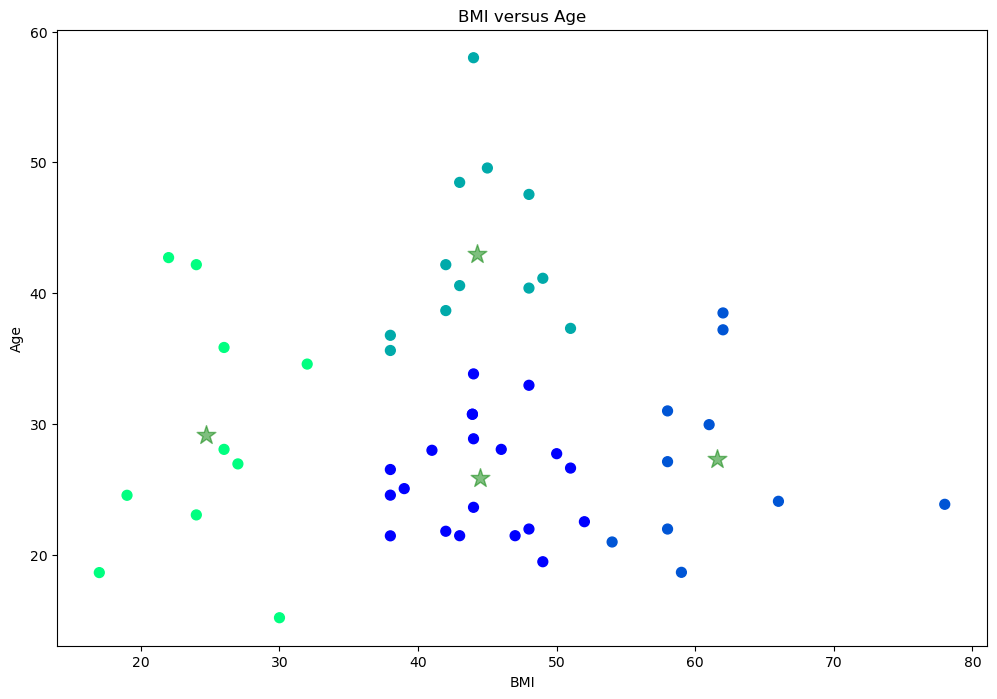

In [312]:
plt.figure(figsize=(12,8))

df = pd.DataFrame(data)
df = df[['Age at presentation', 'BMI']]
df = df.rename(columns={"Age at presentation": "Age"})
df = df.fillna(df.mean())
pd.to_numeric(df['Age'])


kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5, marker='*');
plt.title('BMI versus Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

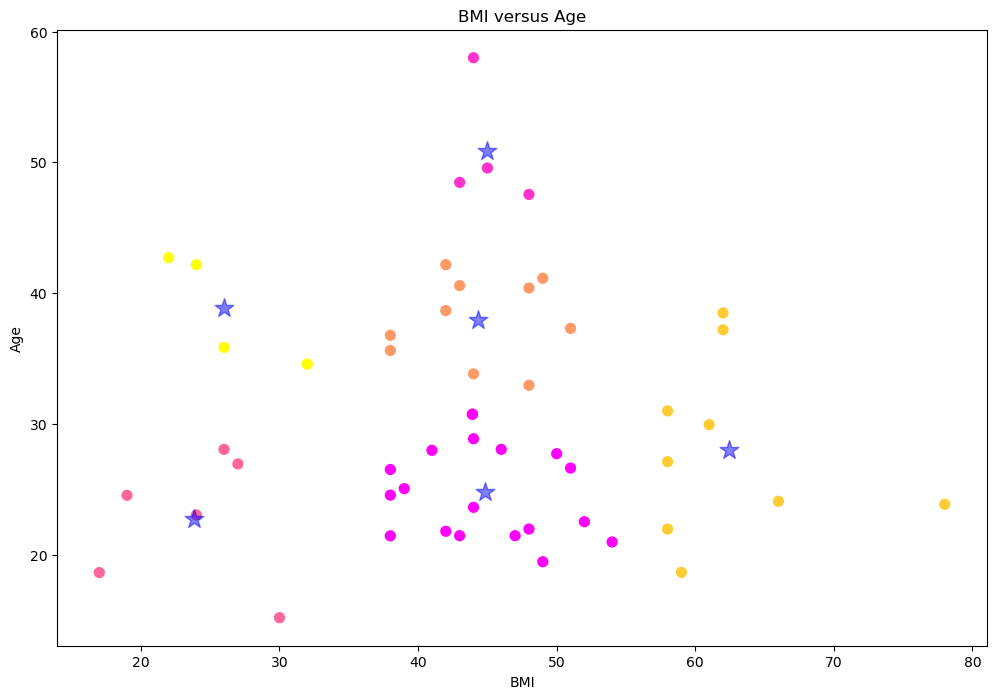

In [313]:
plt.figure(figsize=(12,8))

df = pd.DataFrame(data)
df = df[['Age at presentation', 'BMI']]
df = df.rename(columns={"Age at presentation": "Age"})
df = df.fillna(df.mean())
pd.to_numeric(df['Age'])


kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5, marker='*');
plt.title('BMI versus Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

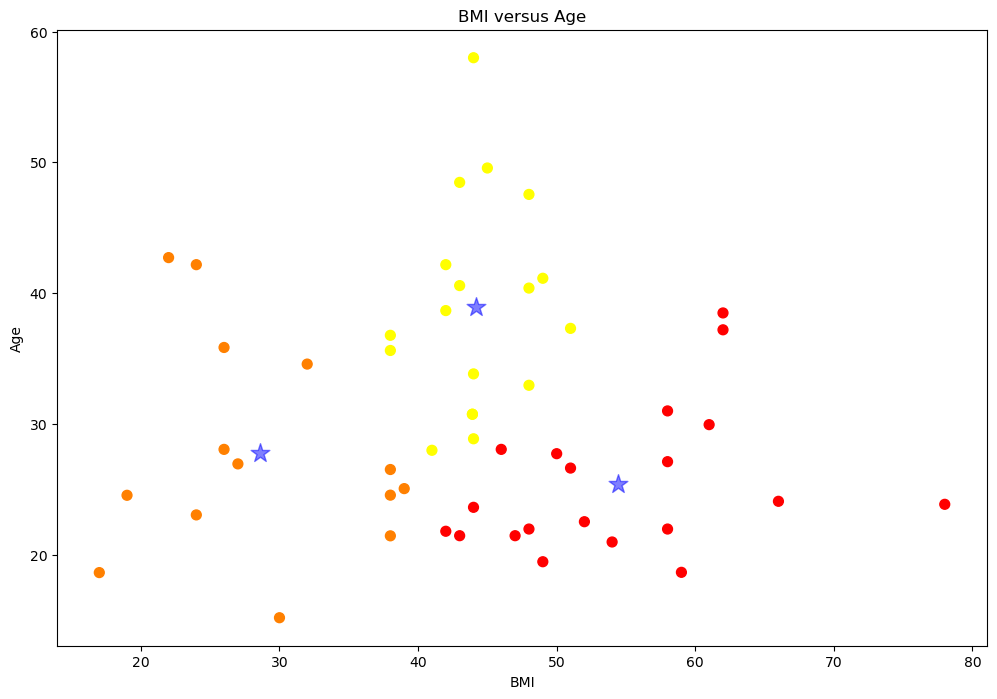

In [319]:
plt.figure(figsize=(12,8))

df = pd.DataFrame(data)
df = df[['Age at presentation', 'BMI']]
df = df.rename(columns={"Age at presentation": "Age"})
df = df.fillna(df.mean())
pd.to_numeric(df['Age'])


kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='autumn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5, marker='*');
plt.title('BMI versus Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

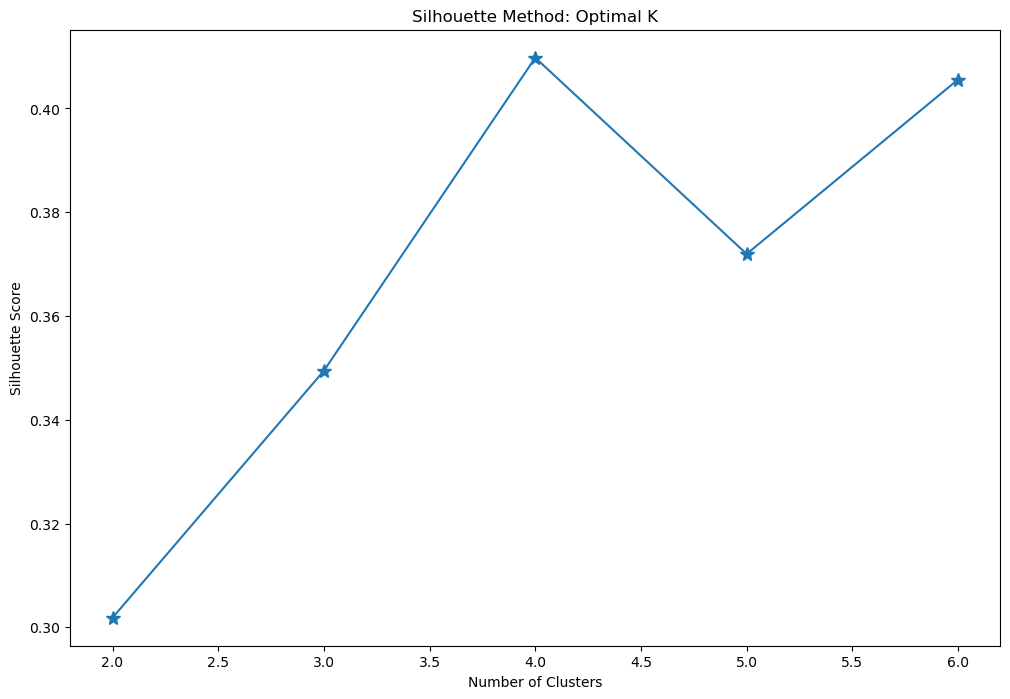

In [315]:
plt.figure(figsize=(12,8))

from sklearn.metrics import silhouette_score

clusters = [2, 3, 4, 5, 6]
avg_silhouette = []
for num in clusters:
    kmeans = KMeans(n_clusters=num, init='k-means++', n_init='auto', random_state=12)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(df, cluster_labels))

plt.plot(clusters, avg_silhouette,marker='*', markersize=10)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Method: Optimal K')
plt.show()

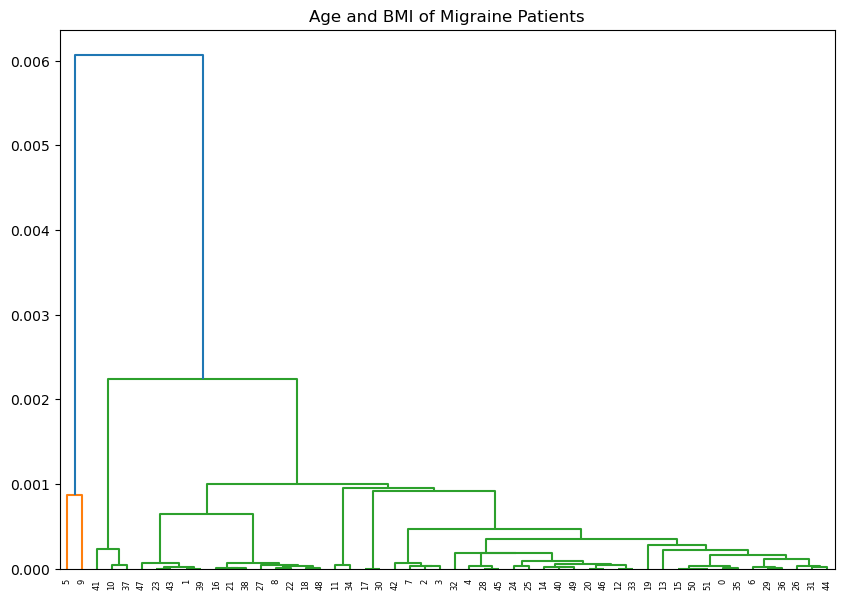

In [316]:
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize =(10,7))
plt.title('Age and BMI of Migraine Patients')
dend = shc.dendrogram(shc.linkage(df, metric='cosine'))
plt.axhline(y=0.0115, color='black', linestyle='--')
plt.show()